***In this notebook, we explore the data and apply different time series models for forecasting***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [2]:
df=pd.read_excel('https://community.tableau.com/servlet/JiveServlet/previewBody/1236-102-2-15278/Sample%20-%20Superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


***DATA EXPLORATION***

In [4]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
cols=['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Quantity', 'Discount', 'Product Name']
df.drop(cols, axis=1, inplace=True)
df.head()

,Order Date,Category,Sub-Category,Sales,Profit
0,2016-11-08,Furniture,Bookcases,261.9600,41.9136
1,2016-11-08,Furniture,Chairs,731.9400,219.5820
2,2016-06-12,Office Supplies,Labels,14.6200,6.8714
3,2015-10-11,Furniture,Tables,957.5775,-383.0310
4,2015-10-11,Office Supplies,Storage,22.3680,2.5164


In [9]:
df_offsup = df[(df.Category == 'Office Supplies')]
df_offsup.head()

,Order Date,Category,Sub-Category,Sales,Profit
2,2016-06-12,Office Supplies,Labels,14.620,6.8714
4,2015-10-11,Office Supplies,Storage,22.368,2.5164
6,2014-06-09,Office Supplies,Art,7.280,1.9656
8,2014-06-09,Office Supplies,Binders,18.504,5.7825
9,2014-06-09,Office Supplies,Appliances,114.900,34.4700


In [10]:
df.groupby(['Category'], as_index=False).Sales.sum().sort_values(by="Sales", ascending=False)

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


**BASIC DATA PREPROCESSING AND ANALYSIS**

In [12]:
df_offsup = df_offsup.sort_values(by="Order Date", ascending = True)
df_offsup.head()

,Order Date,Category,Sub-Category,Sales,Profit
7980,2014-01-03,Office Supplies,Paper,16.448,5.5512
740,2014-01-04,Office Supplies,Storage,272.736,-64.7748
739,2014-01-04,Office Supplies,Labels,11.784,4.2717
741,2014-01-04,Office Supplies,Binders,3.540,-5.4870
1759,2014-01-05,Office Supplies,Art,19.536,4.8840


In [13]:
df_offsup = df_offsup.drop(['Sub-Category'], axis=1)
df_offsup.head()

,Order Date,Category,Sales,Profit
7980,2014-01-03,Office Supplies,16.448,5.5512
740,2014-01-04,Office Supplies,272.736,-64.7748
739,2014-01-04,Office Supplies,11.784,4.2717
741,2014-01-04,Office Supplies,3.540,-5.4870
1759,2014-01-05,Office Supplies,19.536,4.8840


In [14]:
df_offsup = df_offsup.groupby('Order Date').Sales.sum().reset_index()
df_offsup.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [15]:
df_offsup = df_offsup.set_index('Order Date')
df_offsup.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [16]:
df_offsup = df_offsup['Sales'].resample('MS').mean()
df_offsup.head()

Order Date
2014-01-01    285.357647
2014-02-01     63.042588
2014-03-01    391.176318
2014-04-01    464.794750
2014-05-01    324.346545
Freq: MS, Name: Sales, dtype: float64

In [17]:
df_offsup = pd.DataFrame(df_offsup)
df_offsup.head()

,Sales
Order Date,
2014-01-01,285.357647
2014-02-01,63.042588
2014-03-01,391.176318
2014-04-01,464.794750
2014-05-01,324.346545


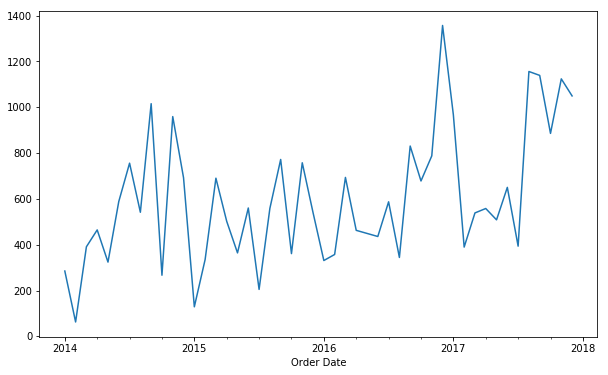

In [151]:
df_offsup.Sales.plot(figsize=(10,6))
plt.show()

In [19]:
df_offsup['Date'] = df_offsup.index
df_offsup.head()

,Sales,Date
Order Date,,
2014-01-01,285.357647,2014-01-01
2014-02-01,63.042588,2014-02-01
2014-03-01,391.176318,2014-03-01
2014-04-01,464.794750,2014-04-01
2014-05-01,324.346545,2014-05-01


In [20]:
df_offsup['month_val']=pd.DatetimeIndex(df_offsup['Date']).month
df_offsup.head()

,Sales,Date,month_val
Order Date,,,
2014-01-01,285.357647,2014-01-01,1
2014-02-01,63.042588,2014-02-01,2
2014-03-01,391.176318,2014-03-01,3
2014-04-01,464.794750,2014-04-01,4
2014-05-01,324.346545,2014-05-01,5


In [21]:
df_offsup['year']=df_offsup['Date'].dt.year
df_offsup_piv=pd.pivot_table(df_offsup, values = "Sales", columns = "year", index="month_val")
df_offsup_piv

year,2014,2015,2016,2017
month_val,,,,
1,285.357647,129.198571,331.230125,967.013136
2,63.042588,335.504187,357.597368,389.882737
3,391.176318,690.545522,693.877240,538.899481
4,464.794750,502.342320,462.932478,558.229296
5,324.346545,364.549440,449.489724,508.776444
6,588.774409,560.407737,436.072400,650.463038
7,756.060400,205.214739,587.474727,393.902615
8,541.879143,558.814667,344.605385,1156.148154
9,1015.677704,772.230680,830.847786,1139.137250


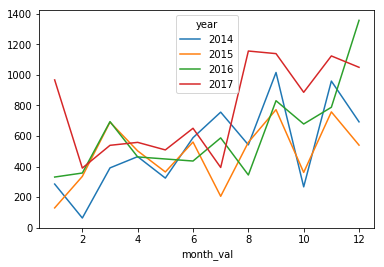

In [22]:
df_offsup_piv.plot()
plt.show()

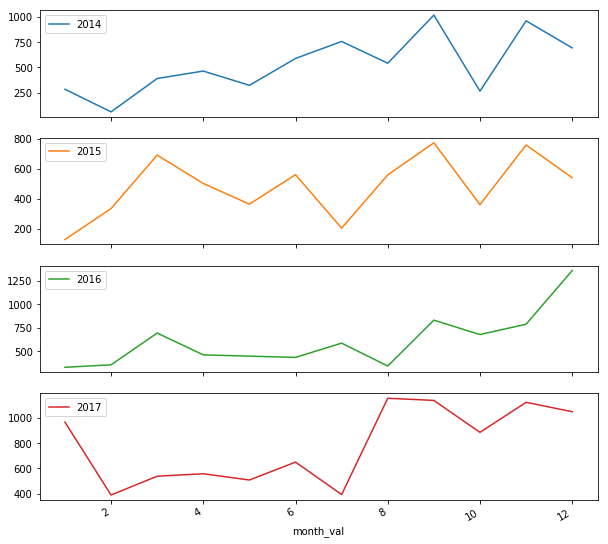

In [80]:
df_offsup_piv.plot(subplots=True, figsize=(10,10), label='Monthly Sales')
plt.legend()

In [24]:
df_offsup.head()

,Sales,Date,month_val,year
Order Date,,,,
2014-01-01,285.357647,2014-01-01,1,2014
2014-02-01,63.042588,2014-02-01,2,2014
2014-03-01,391.176318,2014-03-01,3,2014
2014-04-01,464.794750,2014-04-01,4,2014
2014-05-01,324.346545,2014-05-01,5,2014


In [25]:
df_offsup = df_offsup.drop(['month_val', 'year'], axis=1)
df_offsup.head()

,Sales,Date
Order Date,,
2014-01-01,285.357647,2014-01-01
2014-02-01,63.042588,2014-02-01
2014-03-01,391.176318,2014-03-01
2014-04-01,464.794750,2014-04-01
2014-05-01,324.346545,2014-05-01


In [26]:
df_offsup['LogSales']=np.log(df_offsup.Sales)

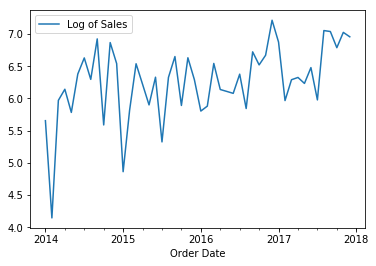

In [158]:
df_offsup.LogSales.plot(label='Log of Sales')
plt.legend()

Dickey Fuller Test Results:
Test Statistic                 -4.664633
p-value                         0.000098
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
dtype: float64
Test Statistic                 -4.664633
p-value                         0.000098
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
dtype: float64
Test Statistic                 -4.664633
p-value                         0.000098
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


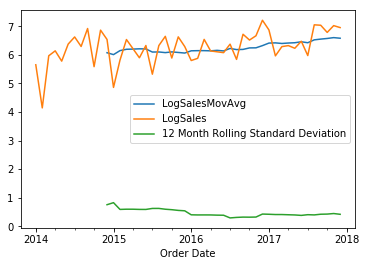

In [163]:
#Simple Moving Average
df_offsup['LogSalesMovAvg'] = df_offsup['LogSales'].rolling(12).mean()
df_offsup.plot(kind='line', y= ['LogSalesMovAvg', 'LogSales'])
df_offsup['LogSales'].rolling(12).std().plot(label='12 Month Rolling Standard Deviation')
plt.legend()
#Let's perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results:')
dftest = adfuller(df_offsup['Sales'], autolag='AIC')
dfres = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for a,b in dftest[4].items():
    dfres['Critical Value (%s)'%a] = b
    print(dfres)

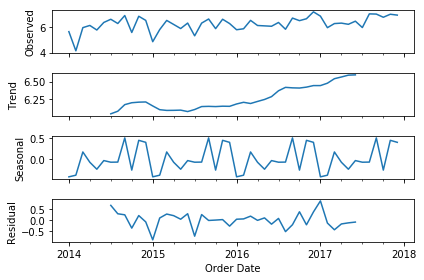

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_offsup['LogSales'], model='additive')
fig = decomp.plot()

In [31]:
!pip install statsmodels 

In [33]:
#Lets improve stationarity using Differencing

In [37]:
df_offsup_log = np.log(df_offsup['Sales'].astype(float))

In [38]:
df_offsup_log_diff = df_offsup_log - df_offsup_log.shift()

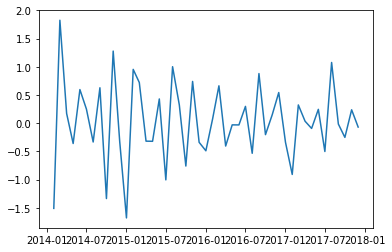

In [40]:
plt.plot(df_offsup_log_diff)

In [41]:
from statsmodels.tsa.stattools import acf, pacf

In [43]:
df_offsup_log_diff = df_offsup_log_diff.dropna()
lag_acf = acf(df_offsup_log_diff, nlags=20)
lag_pacf = pacf(df_offsup_log_diff, nlags=20, method = 'ols')

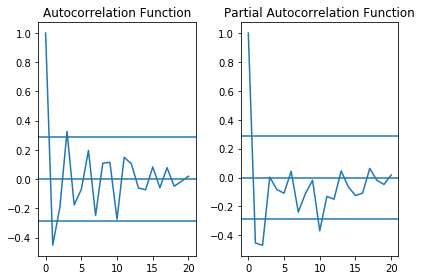

In [48]:
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')
plt.axhline(y=0)
plt.axhline(y=-1.96/np.sqrt(len(df_offsup_log_diff)))
plt.axhline(y=1.96/np.sqrt(len(df_offsup_log_diff)))
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.axhline(y=0)
plt.axhline(y=-1.96/np.sqrt(len(df_offsup_log_diff)))
plt.axhline(y=1.96/np.sqrt(len(df_offsup_log_diff)))
plt.tight_layout()

In [49]:
df_offsup_log_diff.head()

Order Date
2014-02-01   -1.509933
2014-03-01    1.825348
2014-04-01    0.172438
2014-05-01   -0.359783
2014-06-01    0.596231
Freq: MS, Name: Sales, dtype: float64

RSS: 1.879411893219144


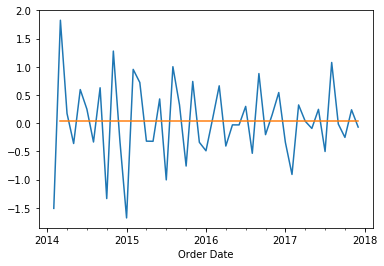

In [165]:
#Running the ARIMA Model (0,1,0)
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA3 = ARIMA(df_offsup_log_diff, order = (0,1,0))
result_ARIMA3 = model_ARIMA3.fit(disp = -1)
df_offsup_log_diff.plot()
result_ARIMA3.fittedvalues.plot()
print('RSS:', np.sum(df_offsup_log_diff - result_ARIMA3.fittedvalues)**2)

In [54]:
#Running the ARIMA Model (1,1,1)
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA = ARIMA(df_offsup_log_diff, order = (1,1,1))
result_ARIMA = model_ARIMA.fit(disp = -1)

In [55]:
result_ARIMA.fittedvalues.head()

Order Date
2014-03-01   -0.001092
2014-04-01   -2.475976
2014-05-01    0.325150
2014-06-01    0.857043
2014-07-01   -0.540136
Freq: MS, dtype: float64

RSS: 7.382358579559423


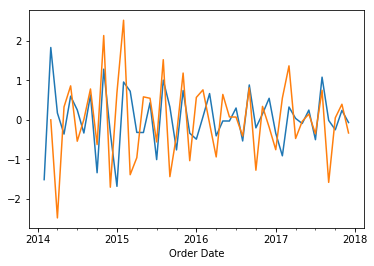

In [71]:
df_offsup_log_diff.plot()
result_ARIMA.fittedvalues.plot()
print('RSS:', np.sum(df_offsup_log_diff - result_ARIMA.fittedvalues)**2)

RSS: 13.697302930994768


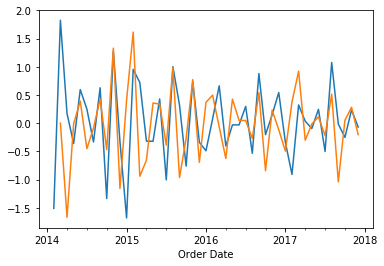

In [86]:
#Running the ARIMA Model (0,1,1)
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA1 = ARIMA(df_offsup_log_diff, order = (0,1,1))
result_ARIMA1 = model_ARIMA1.fit(disp = -1)
df_offsup_log_diff.plot()
result_ARIMA1.fittedvalues.plot()
print('RSS:', np.sum(df_offsup_log_diff - result_ARIMA1.fittedvalues)**2)

C:\Users\Harsh\.LSC\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Harsh\.LSC\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Harsh\.LSC\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[n

RSS: 11.903891905832374


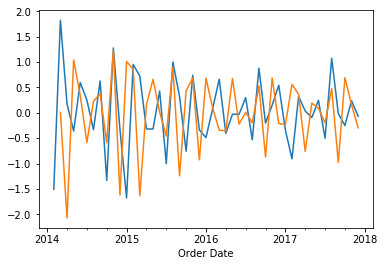

In [73]:
#Running the ARIMA Model (1,1,0)
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA2 = ARIMA(df_offsup_log_diff, order = (1,1,0))
result_ARIMA2 = model_ARIMA2.fit(disp = -1)
df_offsup_log_diff.plot()
result_ARIMA2.fittedvalues.plot()
print('RSS:', np.sum(df_offsup_log_diff - result_ARIMA2.fittedvalues)**2)

In [62]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in c:\users\harsh\.lsc\lib\site-packages (0.9.0)


**Finally let us apply the most efficient ARIMA Model and calculate its accuracy**

In [149]:
#Split train, test data
X = df_offsup['Sales'].values
train=X[0:36]
test=X[36:]
X.shape, train.shape, test.shape

((48,), (36,), (12,))

In [139]:
#Selecting the best parameters for ARIMA Model
import itertools
p=d=q=range(0,9)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [140]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit=model_arima.fit()
        print (param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 506.4183296830488
(0, 0, 1) 508.23250943359716
(0, 0, 2) 509.9288263651837
(0, 0, 3) 508.18103498250423
(0, 0, 4) 510.16947795814394
(0, 0, 5) 512.1694635579713
(0, 0, 6) 513.1633024835207
(0, 0, 7) 514.147605478949
(0, 0, 8) 515.5607972149522
(0, 1, 0) 508.8409347154868
(0, 1, 1) 495.14665439393843
(0, 1, 3) 495.9357895549815
(0, 1, 4) 496.52672111274
(0, 1, 5) 498.56230776583413
(0, 1, 6) 499.20381862653744
(0, 1, 7) 499.2479566235794
(0, 1, 8) 500.87127035518745
(0, 2, 0) 531.7102226754083
(0, 2, 1) 500.69795667517866
(1, 0, 0) 508.1997526082818
(1, 1, 0) 499.6714054468579
(1, 1, 1) 496.18052108868426
(1, 1, 2) 496.11527695700374
(1, 1, 3) 498.74713503869555
(1, 1, 6) 499.34545964732695
(1, 2, 0) 515.1827746622878
(2, 0, 0) 509.832738944433
(2, 0, 1) 511.22477863891237
(2, 1, 0) 493.06650524282384
(2, 1, 1) 495.0634951668844
(2, 1, 2) 496.99929194834726
(2, 1, 3) 497.9765552796731
(2, 2, 0) 496.93315193772344
(2, 2, 1) 487.1254940000098
(2, 2, 2) 489.0896172408645
(2, 2, 5

In [152]:
model_arima = ARIMA(train, order = (2,2,1))
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.forecast(steps=12)[0]
predictions

array([ 929.09081584, 1080.56648295, 1243.79704593, 1126.13761683,
       1228.95762796, 1291.11424039, 1283.75001909, 1353.24483979,
       1396.61974298, 1426.74859159, 1482.03311786, 1525.79749411])